# Points on a Circle

Recall the example of discovering the rules behind paintball shots with 2 circles.
Let's try to write a model that recognizes the rules.

In [1]:
#
# Import the familiar libraries
#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
def circle(r, n):
    """a function that returns x and y coordinates of n points on a circle centered at 0, 0 with radius r"""
    
    deg = np.random.randint(360, size=n)
    rad = np.deg2rad(deg)
    
    # TODO: assign x and y
    x = r * np.cos(rad)
    y = r * np.sin(rad)
    
    return x, y

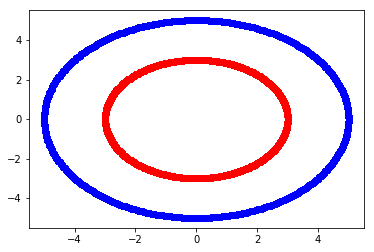

In [3]:
colors = [(3, 'r'), (5, 'b')]
data = []
labels = []
n = 10000

for r, c in colors:
    x, y = circle(r, n)
    
    data.extend(zip(x, y))
    labels.extend([c == 'r'] * n)
    
    plt.plot(x, y, c + 'o', alpha=0.5)

plt.show()

data = np.array(data)
labels = np.array(labels)

In [4]:
#
# Split the data and the labels using scikit built-in function train_test_split
#
from sklearn.model_selection import train_test_split

#
# TODO: split data and labels to 90% train and 10% test and assign X_train, X_test, y_train, y_test
#
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.10, random_state=42)

In [5]:
#
# Try to classify the circles with nearest neighbor classifier
#
from sklearn.neighbors import KNeighborsClassifier

nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(X_train, y_train)
y_pred = nbrs.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

* What is the memory requirement for nearest neighbour classifier on the dataset above?
* How much memory would we use if we build the model for detecting the two circles manually?

## Neural Networks

In [6]:
#
# PyTorch is a popular neural networks library written by Facebook
#
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable

In [7]:
#
# Neural Network Model (1 hidden layer)
#
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [8]:
net = Net(data.shape[1], 10, 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

In [9]:
#
# Convert x and y to torch tensors.
# Torch tensors are like numpy array that keep also the computation history used to calculate the gradients.
#
x = torch.from_numpy(X_train).type(torch.FloatTensor)
y = torch.from_numpy(y_train.astype(float)).type(torch.LongTensor)

#
# DataLoader is an object that allows to conviniently split the training set into batches.
#
train_loader = DataLoader(dataset=TensorDataset(x, y), batch_size=50, shuffle=True)

In [10]:
#
# Usually a few iteration over the training set are requried for the network to converge.
# Each such iteration is called an epoch.
#
for epoch in range(5):
    #
    # In every epoch we train on all the batches in the training set
    #
    for x, y in train_loader:
        x = Variable(x)
        y = Variable(y)
        
        #
        # Reset the gradients
        #
        optimizer.zero_grad()
        
        #
        # Run the network forward
        #
        outputs = net(Variable(x))
        
        #
        # Calculate the loss
        #
        loss = criterion(outputs, Variable(y))
        
        #
        # Run the network backward
        #
        loss.backward()
        
        #
        # Update the weights by the gradients multiplied by learning rate
        #
        optimizer.step()
    
    print(epoch, loss.data[0], flush=True)

0 tensor(0.6083)


/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


1 tensor(0.3637)
2 tensor(0.1879)
3 tensor(1.00000e-02 *
       9.9977)
4 tensor(1.00000e-02 *
       4.8918)


In [11]:
#
# Test the Model
#
predicted = []

for x, y in zip(X_test, y_test):
    x = torch.from_numpy(x).type(torch.FloatTensor)
    outputs = net(Variable(x))
    outputs = outputs.detach().numpy()
    predicted += [np.argmax(outputs)]

accuracy_score(y_test, predicted)

1.0

## Linear Regression

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#
# Generate linearly related datasets x and y.
#
x = 30 * np.random.rand(1000).astype(np.float32)
y = 0.6 * x + 10
y += 10 * np.random.randn(1000).astype(np.float32)

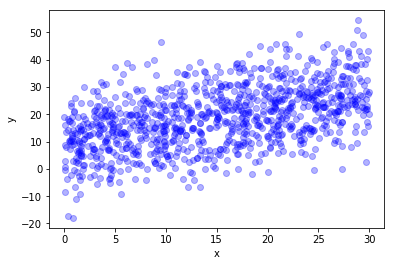

In [13]:
#
# Plot the points
#
def plot_points_and_line(x, y, w=None, b=None):
    plt.plot(x, y, 'bo', alpha=0.3)
    if w is not None:
        plt.plot(x, x * w + b, 'r')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
plot_points_and_line(x, y)

In [14]:
#
# The network is just one linear function
#
net = nn.Linear(1, 1)

#
# Initialize Stochastic Gradient Descent optimizer with learning rate 0.01
# 
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

#
# Define the loss function to be mean square error
#
criterion = nn.MSELoss()

In [15]:
#
# Define the data loader to split into batches
#
x_tensor = torch.from_numpy(x).type(torch.FloatTensor)
y_tensor = torch.from_numpy(y).type(torch.FloatTensor)

batch_size = 10
train_loader = DataLoader(dataset=TensorDataset(x_tensor, y_tensor), batch_size=batch_size, shuffle=True)

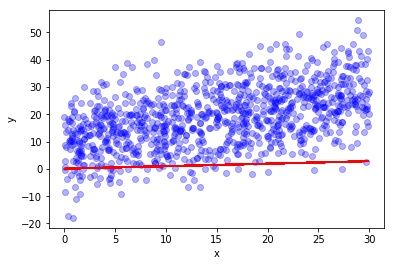

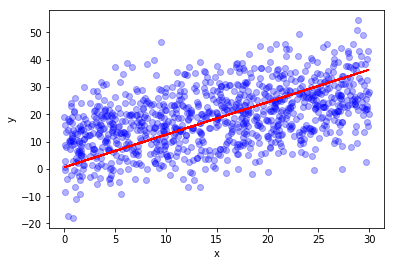

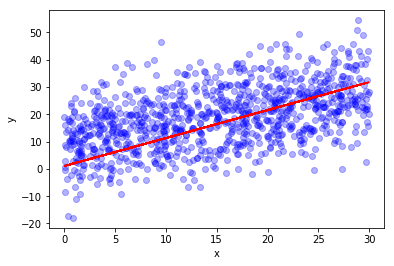

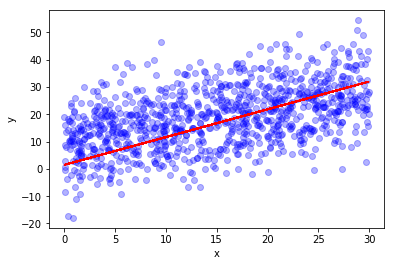

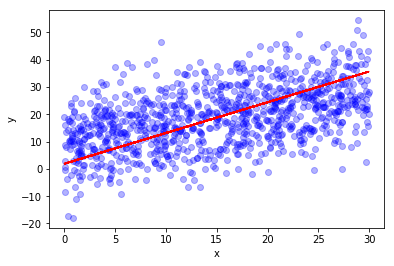

In [16]:
epochs = 5

for i in range(epochs):
    #
    # Draw the points and the line
    #
    w = net.weight.detach().numpy()[0][0]
    b = net.bias.detach().numpy()[0]
    plot_points_and_line(x, y, w, b)

    for bx, by in train_loader:
        #
        # TODO Perform training on batch bx, by
        #
        bx = Variable(bx.view(10, 1))
        by = Variable(by.view(10, 1))

        optimizer.zero_grad()
        outputs = net(bx)

        loss = criterion(outputs, by)
        loss.backward()
        optimizer.step()

## Convolutional Neural Networks

In [17]:
def create_circle_image(r, shape=[32, 32]):
    """a function that returns a black and white image of a given shape with black background
       and 20 white points on a circle with radius r centered at the middle of the image"""

    im = np.zeros(shape)
    x, y = circle(r, 20)
    
    #
    # TODO: put the black points in an image
    #
    x = x.astype(int) + (shape[0] // 2)
    y = y.astype(int) + (shape[1] // 2)
    im[x.astype(int), y] = 1
    
    return im

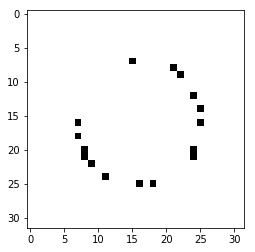

In [18]:
#
# Draw the image
#
im = create_circle_image(10)
plt.imshow(im, cmap='binary')
plt.show()

In [19]:
n = 1000
radius = [((i % 2) + 1) * 5 for i in range(n)]
labels = [(i % 2) for i in range(n)]

#
# TODO: Generate array of n images such that circle radius of images[i] is radius[i] (for 0<i<n)
#
images = [create_circle_image(r) for r in radius]

In [20]:
#
# Split the images and the labels into train and test
#
X_train, X_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=0.10, random_state=42)

In [21]:
#
# Convert x and y to torch tensors.
#
x = torch.from_numpy(X_train).type(torch.FloatTensor).view(len(y_train), 1, 32, 32)
y = torch.from_numpy(y_train.astype(float)).type(torch.LongTensor)

#
# Create a DataLoader
#
train_loader = DataLoader(dataset=TensorDataset(x, y), batch_size=50, shuffle=True)

In [31]:
#
# Convolutional Neural Network Model
#
class Net(nn.Module):
    def __init__(self, filters=(10, 20), kernel=5, pool=2, linear=(500, 120), output=2):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, filters[0], kernel_size=kernel),
            nn.MaxPool2d(pool),
            nn.ReLU())
        self.conv2 = nn.Sequential(
            nn.Conv2d(filters[0], filters[1], kernel_size=kernel),
            nn.Dropout2d(),
            nn.MaxPool2d(pool),
            nn.ReLU())
        self.linear1 = nn.Sequential(
            nn.Linear(linear[0], linear[1]),
            nn.Dropout(),
            nn.ReLU())
        self.linear2 = nn.Sequential(
            nn.Linear(linear[1], output),
            nn.ReLU())
        self._n = linear[0]
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1, self._n)
        x = self.linear1(x)
        return self.linear2(x)

In [23]:
#
# Train the network
#
net = Net()
optimizer = torch.optim.Adam(net.parameters())
criterion = nn.CrossEntropyLoss()

for epoch in range(4):
    for batch_index, (inputs, labels) in enumerate(train_loader):
        inputs, labels = Variable(inputs), Variable(torch.squeeze(labels))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(epoch, loss.data[0])

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


0 tensor(0.3002)
1 tensor(1.00000e-03 *
       1.8705)
2 tensor(1.00000e-04 *
       2.0842)
3 tensor(1.00000e-05 *
       8.4701)


In [24]:
#
# Test the Model
#
predicted = []

for x, y in zip(X_test, y_test):
    x = torch.from_numpy(x).view(1, 1, 32, 32).type(torch.FloatTensor)
    outputs = net(Variable(x))
    outputs = outputs.detach().numpy()
    predicted += [np.argmax(outputs)]

accuracy_score(y_test, predicted)

1.0

## MNIST

In [25]:
import torchvision

#
# Download MNIST Dataset
#

transform = torchvision.transforms.ToTensor()


train_dataset = torchvision.datasets.MNIST('tmp', train=True, download=True,
                                           transform=transform)
test_dataset = torchvision.datasets.MNIST('tmp', train=False, download=True,
                                          transform=transform)

In [26]:
#
# TODO: Create Data Loader that will allow iterating on batches of size 5
#
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=5, shuffle=True)

In [27]:
#
# Display 1 batch
#
def show_batch(batch):
    im = torchvision.utils.make_grid(batch)
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    plt.show()

Labels:  tensor([ 0,  0,  0,  0,  8])
Batch shape:  torch.Size([5, 1, 28, 28])


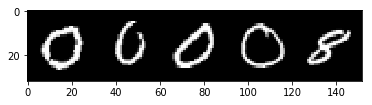

In [28]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

print('Labels: ', labels)
print('Batch shape: ', images.size())

show_batch(images)

In [ ]:
#
# TODO: Create a neural network that will be able to recognize the above handwritten digits.
# Train the network and test the results.
#

# Back to Spam

In [58]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 7), stride=1),
            nn.ReLU()
        )

        self.maxpool1 = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))

        self.conv2 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 7), stride=1),
            nn.ReLU()
        )
        self.maxpool2 = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))

        self.conv3 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.conv4 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.conv5 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.conv6 = nn.Sequential(
            nn.Conv2d(1, 256, kernel_size=(256, 3), stride=1),
            nn.ReLU()
        )

        self.maxpool6 = nn.MaxPool2d(kernel_size=(1, 3), stride=(1, 3))

        self.fc1 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5)
        )
        self.fc2 = nn.Sequential(
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(p=0.5)
        )
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.conv1(x)
        x = x.transpose(1, 2)       
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = x.transpose(1, 2)
        x = self.maxpool2(x)
        x = self.conv3(x)
        x = x.transpose(1, 2)
        x = self.conv4(x)
        x = x.transpose(1, 2)
        x = self.conv5(x)
        x = x.transpose(1, 2)
        x = self.conv6(x)
        x = x.transpose(1, 2)
        x = self.maxpool6(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        return x

In [33]:
#
# numpy is a library which allows manipulating arrays and matrices in Python in a similar way to Matlab.
#
import numpy as np
#
# Put random seed 0 to be consistent in the examples
#
np.random.seed(0)

#
# Read email files path and labels
#
with open('datasets/trec07p/full/index') as f:
    # index file contains one line per email with the following form: path ham/spam
    # (ham means non-spam)
    files = [line.strip().split() for line in f]
    ham = ['datasets/trec07p/full/' + path for cls, path in files if cls == 'ham']
    spam = ['datasets/trec07p/full/' + path for cls, path in files if cls == 'spam'][:len(ham)]
    
    # join ham and spam file paths and create labels vector
    emails = ham + spam
    
    # labels vector will contain 0 for ham messages and 1 for spam messages
    labels = np.zeros((len(emails),))
    labels[len(ham):] = 1

    # Shuffle the messages
    permutation = np.random.permutation(labels.size)
    emails = [emails[i] for i in permutation]
    labels = labels[permutation] > 0

In [34]:
#
# Split the data (the emails and the labels) into training and test sets
# in such way that training set contains 40000 emails and the test set the rest
#
train = emails[:40000]
test = emails[40000:]

y_train = labels[:40000]
y_test = labels[40000:]

In [35]:
def read_file(path):
    with open(path, 'rb') as f:
        return f.read()

#
# Since we deal in this exercice with relatively small dataset, we can load everything into memory
#
train = [read_file(path) for path in train]
test = [read_file(path) for path in test]

In [36]:
def subject(content):
    """This function extracts the subject from an eml file"""
    
    # EML file begins with headers section which ends by two blank lines
    i = content.find(b'\n\n')
    if i < 0:
        return b''
    headers = content[:i]

    # One of the headers is the Email Subject
    subj = b'\nSubject:'
    j = headers.find(subj)
    if j < 0:
        return b''

    # Return the first line of the subject
    return headers[j+len(subj):].split(b'\n', maxsplit=1)[0].strip()

In [37]:
subjects = [subject(e) for e in train]

In [39]:
I = np.eye(256)

def encode(subj):
    if len(subj) > 128:
        subj = subj[:128]
    elif len(subj) < 128:
        subj = subj + (128 - len(subj)) * b'_'
    return np.hstack([I[b, :] for b in subj])

onehot = np.array([encode(s) for s in subjects])

In [40]:
#
# TODO: Use the network above to classify spam by subject only.
# Write the training code, the test code and print the accuracy.
#

In [41]:
x, y = torch.from_numpy(onehot), torch.from_numpy(y_train.astype(float))
x, y = x.type(torch.FloatTensor), y.type(torch.LongTensor)
x = x.view(len(y_train), 1, 256, 128)
dataset = TensorDataset(x, y)
train_loader = DataLoader(dataset=dataset, batch_size=40, shuffle=True)

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())

for epoch in range(2):
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = Variable(inputs), Variable(torch.squeeze(labels))
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 10 == 0:
            print(i, loss.data[0])
    print(epoch, loss.data[0])

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  


0 tensor(1.3822)
10 tensor(0.9026)
20 tensor(0.7502)
30 tensor(0.7553)
40 tensor(0.6967)
50 tensor(0.7454)
60 tensor(0.7026)
70 tensor(0.6731)
80 tensor(0.7063)
90 tensor(0.6799)
100 tensor(0.7178)
110 tensor(0.6621)
120 tensor(0.5385)
130 tensor(0.6039)
140 tensor(0.4886)
150 tensor(0.4733)
160 tensor(0.3749)
170 tensor(0.5560)
180 tensor(0.3812)
190 tensor(0.4702)
200 tensor(0.2854)
210 tensor(0.2890)
220 tensor(0.5950)
230 tensor(0.3699)
240 tensor(0.3825)
250 tensor(0.3165)
260 tensor(0.1951)
270 tensor(0.3205)
280 tensor(0.2183)
290 tensor(0.2943)
300 tensor(0.2371)
310 tensor(0.2524)
320 tensor(0.3446)
330 tensor(0.1843)
340 tensor(0.2974)
350 tensor(0.2995)
360 tensor(0.3160)
370 tensor(0.2043)
380 tensor(0.3816)
390 tensor(0.2340)
400 tensor(0.1823)
410 tensor(0.3474)
420 tensor(0.4074)
430 tensor(0.2193)
440 tensor(0.1225)
450 tensor(0.2063)
460 tensor(0.3057)
470 tensor(0.4392)
480 tensor(0.1187)
490 tensor(0.3618)
500 tensor(0.3501)
510 tensor(0.1945)
520 tensor(0.1869)
530 

In [63]:
# Test the Model

test_onehot = [encode(subject(e)) for e in test]
predicted = []

for x, y in zip(test_onehot, y_test):
    x = torch.from_numpy(x).view(1, 1, 256, 128)
    x = x.type(torch.FloatTensor)
    outputs = net(Variable(x))
    outputs = outputs.detach().numpy()
    predicted += [np.argmax(outputs)]

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
accuracy_score(y_test, predicted)

0.94070881226053638